In [1]:
#Loading EDA
import pandas
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as ticker

In [2]:
#Loading API 
from googleapiclient.discovery import build

In [3]:
api_key=''

## Channel Ids

In [60]:
channel_ids=['UC7cs8q-gJRlGwj4A8OmCmXg', #Alex the analyst
             'UC2wMHF4HBkTMGLsvZAIWzRg', #JCharis
             'UCiYjpuUaSfkvdZkmtDU7JRw', #MyOnlineTrainingHub
             'UCOjD18EJYcsBog4IozkF_7w', #Pydata
             'UCnVzApLJE2ljPZSeQylSEyg', #Data School
             'UCL2vj8V-Zo4_zVuZvMwR_JA', #goskills
             'UCfJT_eYDTmDE-ovKaxVE1ig', #Kevin Stratvert
             'UC2oCugzU6W8-h95W7eBTUEg', #NN group
             'UCh9nVJoWXmFb7sLApWGcLPQ' #codebasics
            ]

In [61]:
api_service_name='youtube'
api_version='v3'

youtube=build(api_service_name,api_version,developerKey=api_key)

## Creating Dataset

In [62]:
def fetch_channel_data(youtube,channel_ids):
    data=[]
    request=youtube.channels().list(
    part='snippet,contentDetails,statistics',
    id=','.join(channel_ids)
    )
    response=request.execute()
    
    for i in range(len(response['items'])):
        some_data=dict(channel=response['items'][i]['snippet']['title'],
              subscribers=response['items'][i]['statistics']['subscriberCount'],
              views=response['items'][i]['statistics']['viewCount'],
              total_videos=response['items'][i]['statistics']['videoCount'],
              playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        data.append(some_data)
    return data

In [63]:
channel_data=fetch_channel_data(youtube,channel_ids)

In [64]:
channel_data

[{'channel': 'GoSkills.com',
  'subscribers': '8310',
  'views': '660209',
  'total_videos': '190',
  'playlist_id': 'UUL2vj8V-Zo4_zVuZvMwR_JA'},
 {'channel': 'NNgroup',
  'subscribers': '122000',
  'views': '9007087',
  'total_videos': '581',
  'playlist_id': 'UU2oCugzU6W8-h95W7eBTUEg'},
 {'channel': 'codebasics',
  'subscribers': '671000',
  'views': '44708466',
  'total_videos': '564',
  'playlist_id': 'UUh9nVJoWXmFb7sLApWGcLPQ'},
 {'channel': 'Alex The Analyst',
  'subscribers': '295000',
  'views': '11649189',
  'total_videos': '167',
  'playlist_id': 'UU7cs8q-gJRlGwj4A8OmCmXg'},
 {'channel': 'Data School',
  'subscribers': '205000',
  'views': '10388894',
  'total_videos': '139',
  'playlist_id': 'UUnVzApLJE2ljPZSeQylSEyg'},
 {'channel': 'PyData',
  'subscribers': '140000',
  'views': '11394126',
  'total_videos': '2724',
  'playlist_id': 'UUOjD18EJYcsBog4IozkF_7w'},
 {'channel': 'MyOnlineTrainingHub',
  'subscribers': '467000',
  'views': '28462752',
  'total_videos': '210',
  '

In [65]:
df=pandas.DataFrame(channel_data)

In [66]:
df

,channel,subscribers,views,total_videos,playlist_id
0,GoSkills.com,8310,660209,190,UUL2vj8V-Zo4_zVuZvMwR_JA
1,NNgroup,122000,9007087,581,UU2oCugzU6W8-h95W7eBTUEg
2,codebasics,671000,44708466,564,UUh9nVJoWXmFb7sLApWGcLPQ
3,Alex The Analyst,295000,11649189,167,UU7cs8q-gJRlGwj4A8OmCmXg
4,Data School,205000,10388894,139,UUnVzApLJE2ljPZSeQylSEyg
5,PyData,140000,11394126,2724,UUOjD18EJYcsBog4IozkF_7w
6,MyOnlineTrainingHub,467000,28462752,210,UUiYjpuUaSfkvdZkmtDU7JRw
7,Kevin Stratvert,1600000,204340258,584,UUfJT_eYDTmDE-ovKaxVE1ig
8,JCharisTech,16500,2468485,523,UU2wMHF4HBkTMGLsvZAIWzRg


In [67]:
df.to_csv('channels.csv',index=False)

In [68]:
#checking columns
df.columns

Index(['channel', 'subscribers', 'views', 'total_videos', 'playlist_id'], dtype='object')

In [69]:
#checking datatypes
df.dtypes

channel         object
subscribers     object
views           object
total_videos    object
playlist_id     object
dtype: object

In [70]:
df['subscribers']=pandas.to_numeric(df['subscribers'])
df['views']=pandas.to_numeric(df['views'])
df['total_videos']=pandas.to_numeric(df['total_videos'])

In [71]:
df.dtypes

channel         object
subscribers      int64
views            int64
total_videos     int64
playlist_id     object
dtype: object

## Channels popularity 

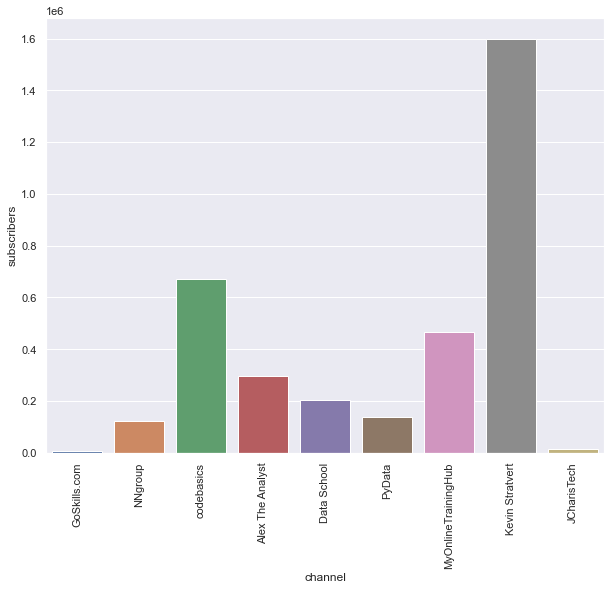

In [72]:
sns.set(rc={'figure.figsize':(10,8)})
bar=sns.barplot(x='channel',y='subscribers',data=df)
plot=bar.set_xticklabels(bar.get_xticklabels(),rotation=90)

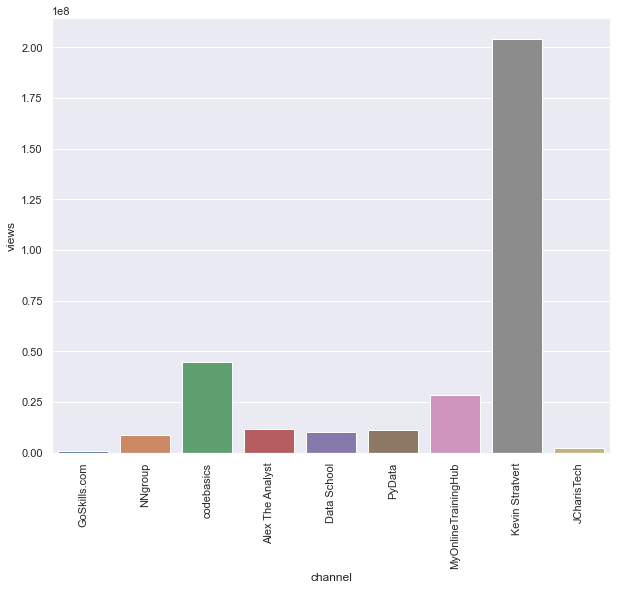

In [73]:
sns.set(rc={'figure.figsize':(10,8)})
bar=sns.barplot(x='channel',y='views',data=df)
plot=bar.set_xticklabels(bar.get_xticklabels(),rotation=90)

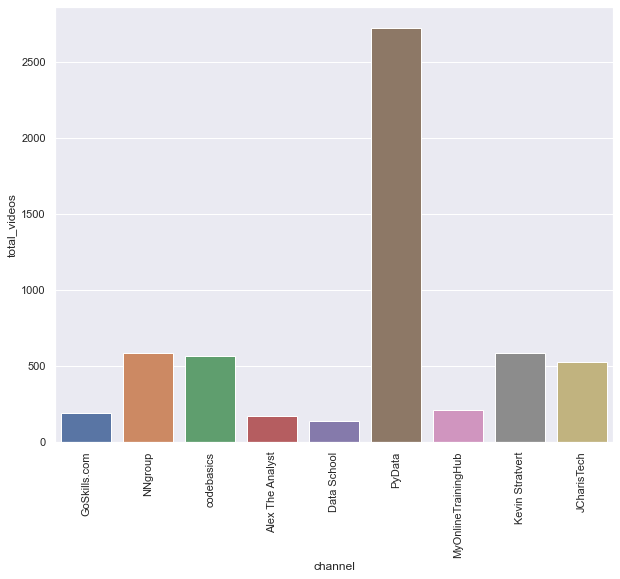

In [74]:
sns.set(rc={'figure.figsize':(10,8)})
bar=sns.barplot(x='channel',y='total_videos',data=df)
plot=bar.set_xticklabels(bar.get_xticklabels(),rotation=90)

In [77]:
playlist_id=df.loc[df['channel']=='PyData','playlist_id'].iloc[0]

In [78]:
playlist_id

'UUOjD18EJYcsBog4IozkF_7w'

In [79]:
def fetch_videoids(youtube,playlist_id):
    videoids=[]
    
    request=youtube.playlistItems().list(
    part='contentDetails',
    playlistId=playlist_id,
    maxResults=50)
    response=request.execute()
    
    for item in range(len(response['items'])):
        videoids.append(response['items'][item]['contentDetails']['videoId'])
        
    return videoids

In [80]:
videoids=fetch_videoids(youtube,playlist_id)

In [81]:
videoids

['1qm79t5n2mU',
 'CcsqasfszjE',
 'y7_MlSSh7Co',
 'YRJTpk3yfTc',
 'U2DtBTxRkCM',
 'PYLgpw4w8EU',
 'BVMRlxIbk1E',
 'FYwGeQ353DY',
 'ZHdWwbVjqJg',
 'G0uKPBbTOKc',
 'FVppO5Pz2Eo',
 'gbSjgSk_b_Q',
 'vY46iIxzLuY',
 'XY53QdT6tWY',
 'J-P6Sczmas8',
 'ZU24BFaUAHg',
 'l-YJm6Umz2s',
 'SBGVRUYutfI',
 'UXBBeNg5YUw',
 'RLfXCcZMv6U',
 'YoxvKgiSjTE',
 'gnymJJRNNvY',
 'KrS5Ey7TxWs',
 'pqlp1sphDvU',
 'yYIjQqPsnm0',
 'hUO0STe6Tls',
 'i3S_KBz1nqA',
 'vDmpP_JRSBY',
 'bf11u4o8tEw',
 'q-gFWt1Msrc',
 'ZMAnEBgJidk',
 'jDEtOb69A7g',
 'vc2Bh9i3bNk',
 'UfJh_5ea0EQ',
 '8fmUqkE7M_0',
 '2ZTvRY-0_og',
 'Nht_r5UH8u4',
 'knmPoaqCoyw',
 'NGYR_f8HlQg',
 't6vqsvYoj0c',
 'JCBLhIiCWW0',
 'OxAKSVuW2Yk',
 'kThC80J5QZs',
 'GBLquwA9hYc',
 'RYQw93jK5Fo',
 'wpWnTdPGKHs',
 'lEGqk3-RBK8',
 'aIxrvlL47io',
 'F74bBGSMwGo',
 'jJqcNU0Zvto']

In [82]:
def fetch_videodetails(youtube,videoids):
    
    videos_=[]
    
    for i in range(0,len(videoids),50):
        request=youtube.videos().list(
        part='snippet,contentDetails,statistics',
        id=','.join(videoids[i:i+50])
        )
        
        response=request.execute()
        
        for v in response['items']:
            stats={'snippet':['channelTitle','title','description',
                             'tags','publishedAt'],
                  'statistics':['viewCount','likeCount','favouriteCount',
                               'commentCount'],
                  'contentDetails':['duration','definition','caption']}
            
            video_detail={}
            video_detail['video_id']=v['id']
            
            for keep in stats.keys():
                for info in stats[keep]:
                    try:
                        video_detail[info]=v[keep][info]
                    except:
                        video_detail[info]=None
            
            videos_.append(video_detail)
        
    return pandas.DataFrame(videos_)

In [83]:
df=fetch_videodetails(youtube,videoids)

In [84]:
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,1qm79t5n2mU,PyData,PyData Chicago: Decision Support with Simulati...,Talk details: https://www.meetup.com/pydatachi...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-27T13:46:29Z,2053,55,None,1,PT59M30S,hd,false
1,CcsqasfszjE,PyData,Diyar Mohammadi - Near-Duplicate Ad Detection ...,Diyar Mohammadi Presents:\n\nNear-Duplicate Ad...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-23T06:47:23Z,793,23,None,0,PT35M54S,hd,false
2,y7_MlSSh7Co,PyData,"Andrey Manoshin, Hayk Aprikyan | Lightening Ta...",Andrey Manoshin Presents:\n\nEENLP: Cross-ling...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:48Z,344,7,None,2,PT34M55S,hd,false
3,YRJTpk3yfTc,PyData,Hadi Abdi Khojasteh - Large Scale Representati...,Hadi Abdi Khojasteh Presents:\n\nLarge Scale R...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:28Z,317,6,None,0,PT40M54S,hd,false
4,U2DtBTxRkCM,PyData,Sona Hambaryan - A/B Testing in Production | P...,Sona Hambaryan Presents:\n\nBeing part of stat...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:08Z,621,14,None,0,PT35M49S,hd,false
5,PYLgpw4w8EU,PyData,Liana Minasyan - Target-Based Sentiment Analys...,Liana Minasyan Presents:\n\nTarget-Based Senti...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:24:44Z,377,22,None,3,PT23M26S,hd,false
6,BVMRlxIbk1E,PyData,Sergey Hayrapetyan - Bachelor theses in Deep L...,Sergey Hayrapetyan Presents:\n\nBachelor these...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:24:14Z,200,5,None,0,PT28M16S,hd,false
7,FYwGeQ353DY,PyData,Meirav Ben Izhak - NetworkX - your Unexpected ...,Meirav Ben Izhak Presents:\n\nNetworkX - your ...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:23:45Z,348,7,None,0,PT24M,hd,false
8,ZHdWwbVjqJg,PyData,Hrach Asatryan - Large Scale Field Delineation...,Hrach Asatryan Presents:\n\nLarge Scale Field ...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:23:28Z,91,3,None,0,PT41M20S,hd,false
9,G0uKPBbTOKc,PyData,Luka Chkhetiani - Scaling Semi-Supervised Prod...,Luka Chkhetiani Presents:\n\nScaling Semi-Supe...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:23:08Z,149,7,None,0,PT43M30S,hd,false


## Preprocessing

In [85]:
#Checking datatypes
df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [86]:
df['publishedDate']=pandas.to_datetime(df['publishedAt']).dt.date

In [87]:
df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
publishedDate     object
dtype: object

In [88]:
df['views']=pandas.to_numeric(df['viewCount'])
df['likes']=pandas.to_numeric(df['likeCount'])
df['comments']=pandas.to_numeric(df['commentCount'])

In [89]:
df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
publishedDate     object
views              int64
likes              int64
comments           int64
dtype: object

In [90]:
df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDate,views,likes,comments
0,1qm79t5n2mU,PyData,PyData Chicago: Decision Support with Simulati...,Talk details: https://www.meetup.com/pydatachi...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-27T13:46:29Z,2053,55,None,1,PT59M30S,hd,false,2022-09-27,2053,55,1
1,CcsqasfszjE,PyData,Diyar Mohammadi - Near-Duplicate Ad Detection ...,Diyar Mohammadi Presents:\n\nNear-Duplicate Ad...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-23T06:47:23Z,793,23,None,0,PT35M54S,hd,false,2022-09-23,793,23,0
2,y7_MlSSh7Co,PyData,"Andrey Manoshin, Hayk Aprikyan | Lightening Ta...",Andrey Manoshin Presents:\n\nEENLP: Cross-ling...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:48Z,344,7,None,2,PT34M55S,hd,false,2022-09-20,344,7,2
3,YRJTpk3yfTc,PyData,Hadi Abdi Khojasteh - Large Scale Representati...,Hadi Abdi Khojasteh Presents:\n\nLarge Scale R...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:28Z,317,6,None,0,PT40M54S,hd,false,2022-09-20,317,6,0
4,U2DtBTxRkCM,PyData,Sona Hambaryan - A/B Testing in Production | P...,Sona Hambaryan Presents:\n\nBeing part of stat...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:08Z,621,14,None,0,PT35M49S,hd,false,2022-09-20,621,14,0
5,PYLgpw4w8EU,PyData,Liana Minasyan - Target-Based Sentiment Analys...,Liana Minasyan Presents:\n\nTarget-Based Senti...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:24:44Z,377,22,None,3,PT23M26S,hd,false,2022-09-20,377,22,3
6,BVMRlxIbk1E,PyData,Sergey Hayrapetyan - Bachelor theses in Deep L...,Sergey Hayrapetyan Presents:\n\nBachelor these...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:24:14Z,200,5,None,0,PT28M16S,hd,false,2022-09-20,200,5,0
7,FYwGeQ353DY,PyData,Meirav Ben Izhak - NetworkX - your Unexpected ...,Meirav Ben Izhak Presents:\n\nNetworkX - your ...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:23:45Z,348,7,None,0,PT24M,hd,false,2022-09-20,348,7,0
8,ZHdWwbVjqJg,PyData,Hrach Asatryan - Large Scale Field Delineation...,Hrach Asatryan Presents:\n\nLarge Scale Field ...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:23:28Z,91,3,None,0,PT41M20S,hd,false,2022-09-20,91,3,0
9,G0uKPBbTOKc,PyData,Luka Chkhetiani - Scaling Semi-Supervised Prod...,Luka Chkhetiani Presents:\n\nScaling Semi-Supe...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:23:08Z,149,7,None,0,PT43M30S,hd,false,2022-09-20,149,7,0


In [91]:
top_10=df.sort_values(by='views',ascending=False).head(10)

In [92]:
top_10

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishedDate,views,likes,comments
48,F74bBGSMwGo,PyData,Olga Silyutina- ClickHouse Applications in Dat...,"Olga Silyutina, who is a Product Analytics Lea...","[Python, Tutorial, Education, NumFOCUS, PyData...",2022-08-30T17:25:13Z,2935,57,None,2,PT34M46S,hd,false,2022-08-30,2935,57,2
0,1qm79t5n2mU,PyData,PyData Chicago: Decision Support with Simulati...,Talk details: https://www.meetup.com/pydatachi...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-27T13:46:29Z,2053,55,None,1,PT59M30S,hd,false,2022-09-27,2053,55,1
49,jJqcNU0Zvto,PyData,A World-Wide Movement to Improve the Recogniti...,www.pydata.org\n\nPyData is an educational pro...,"[Education, NumFOCUS, PyData, Opensource, lear...",2022-08-26T09:45:42Z,1054,15,None,0,PT58M15S,hd,false,2022-08-26,1054,15,0
44,RYQw93jK5Fo,PyData,PyData Triangle: September 2022 Meeting,www.pydata.org\n\nPyData is an educational pro...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-13T18:35:20Z,938,20,None,0,PT59M13S,hd,false,2022-09-13,938,20,0
1,CcsqasfszjE,PyData,Diyar Mohammadi - Near-Duplicate Ad Detection ...,Diyar Mohammadi Presents:\n\nNear-Duplicate Ad...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-23T06:47:23Z,793,23,None,0,PT35M54S,hd,false,2022-09-23,793,23,0
47,aIxrvlL47io,PyData,"Roman Neruda, Petra Vidnerová: Tested on agent...","Roman Neruda, Petra Vidnerová - Tested on agen...","[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-10T11:57:10Z,761,15,None,1,PT46M40S,hd,false,2022-09-10,761,15,1
4,U2DtBTxRkCM,PyData,Sona Hambaryan - A/B Testing in Production | P...,Sona Hambaryan Presents:\n\nBeing part of stat...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:25:08Z,621,14,None,0,PT35M49S,hd,false,2022-09-20,621,14,0
41,OxAKSVuW2Yk,PyData,Ashot Vardanian - Accelerated Data Science Lib...,Ashot Vardanian Presents:\n\nAccelerated Data ...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:12:11Z,621,21,None,1,PT38M50S,hd,false,2022-09-20,621,21,1
43,GBLquwA9hYc,PyData,Fritz Obermeyer - Probabilistic Programming an...,Fritz Obermeyer Presents:\n\nProbabilistic Pro...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:11:33Z,439,16,None,0,PT1H6M49S,hd,false,2022-09-20,439,16,0
5,PYLgpw4w8EU,PyData,Liana Minasyan - Target-Based Sentiment Analys...,Liana Minasyan Presents:\n\nTarget-Based Senti...,"[Python, Tutorial, Education, NumFOCUS, PyData...",2022-09-20T11:24:44Z,377,22,None,3,PT23M26S,hd,false,2022-09-20,377,22,3


## Top then Videos of Pydata

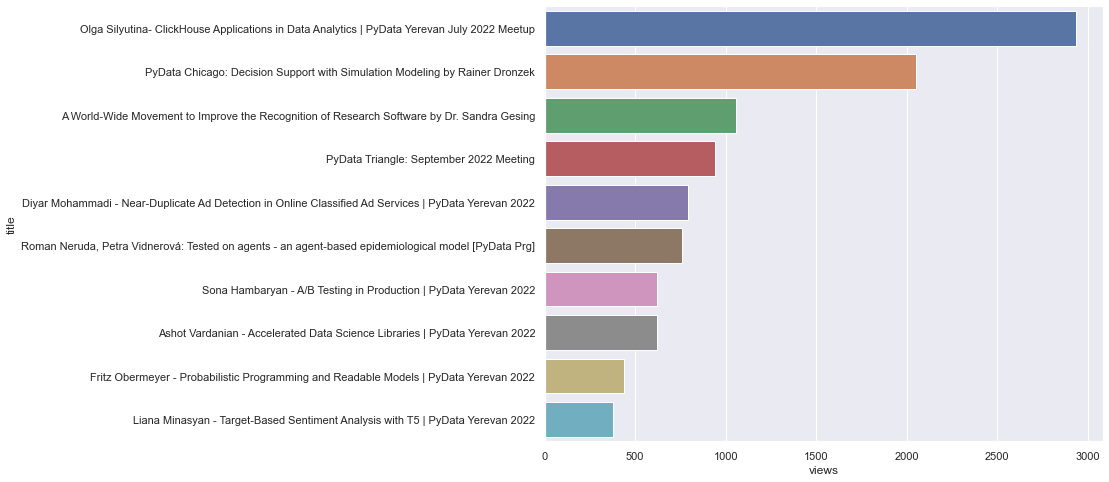

In [93]:
bar=sns.barplot(x='views',y='title',data=top_10)

In [94]:
df['month']=pandas.to_datetime(df['publishedDate']).dt.strftime('%b')

In [95]:
df['month']

0     Sep
1     Sep
2     Sep
3     Sep
4     Sep
5     Sep
6     Sep
7     Sep
8     Sep
9     Sep
10    Sep
11    Sep
12    Sep
13    Sep
14    Sep
15    Sep
16    Sep
17    Sep
18    Sep
19    Sep
20    Sep
21    Sep
22    Sep
23    Sep
24    Sep
25    Sep
26    Sep
27    Sep
28    Sep
29    Sep
30    Sep
31    Sep
32    Sep
33    Sep
34    Sep
35    Sep
36    Sep
37    Sep
38    Sep
39    Sep
40    Sep
41    Sep
42    Sep
43    Sep
44    Sep
45    Sep
46    Sep
47    Sep
48    Aug
49    Aug
Name: month, dtype: object

In [96]:
df_month=df.groupby('month',as_index=False).size()
df_month

,month,size
0,Aug,2
1,Sep,48


## Uploading Schedule

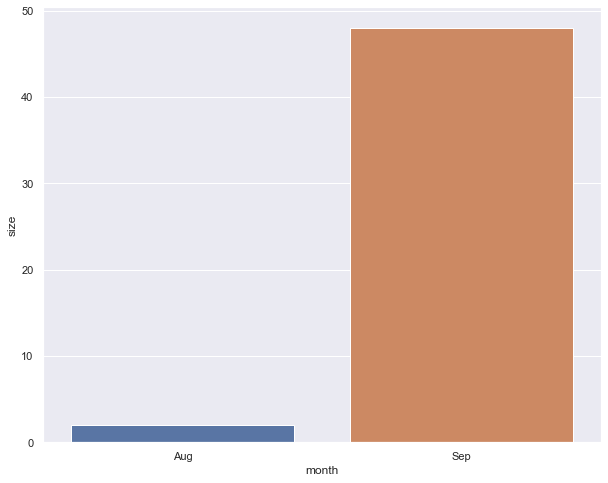

In [97]:
bar=sns.barplot(x='month',y='size',data=df_month,order=df_month.sort_values('size').month)